# <center><b>Face Emotion Recognition DL Project</b></center>
# <center><b>Mostafa Eslam-211003386</b></center>

## Including Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers.legacy import Adam
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import (
    Dense,
    Input,
    Dropout,
    Flatten,
    Conv2D,
    BatchNormalization,
    MaxPooling2D,
)
from keras.models import Model
from sklearn.metrics import confusion_matrix
from keras.models import model_from_json

In [2]:
# Disable warnings
import warnings


def warn(*args, **kwargs):
    pass


warnings.warn = warn

## Loading The Data

In [3]:
data = pd.read_csv("C:\\Users\\mosta\\Desktop\\DL project\\fer2013.csv")

In [4]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
data.shape

(35887, 3)

In [6]:
print("Dataset Shape:", data.shape)
print("Dataset Columns:", data.columns)

Dataset Shape: (35887, 3)
Dataset Columns: Index(['emotion', 'pixels', 'Usage'], dtype='object')


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [8]:
data.describe()

,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [9]:
# Print the distribution of classes
data.Usage.value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [10]:
# Print the number of missing values in each column
missing_values = data.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
emotion    0
pixels     0
Usage      0
dtype: int64


In [11]:
# Creating the correlation matrix
corr_matrix = data.corr()
corr_matrix["emotion"].sort_values(ascending=False)

emotion    1.0
Name: emotion, dtype: float64

In [12]:
# Display the distribution of emotions
emotion_map = {0: 'Angry', 1: 'Disgust', 2 : 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise',6:'Neutral' }
emotion_counts = data['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)
emotion_counts

,emotion,number
0,Angry,4953
1,Fear,5121
2,Sad,6077
3,Neutral,6198
4,Happy,8989
5,Surprise,4002
6,Disgust,547


# Visualization

### Univariate Exploration

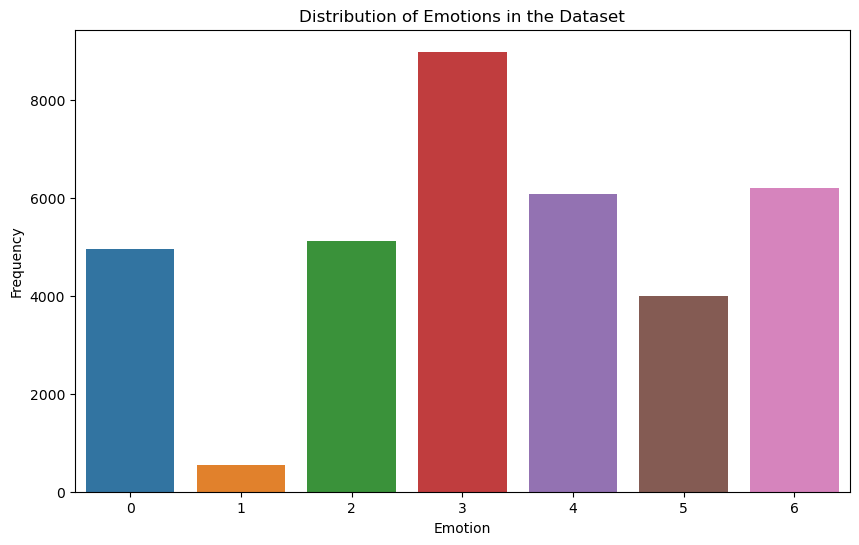

In [13]:
# Count the frequency of each emotion
emotion_counts = data['emotion'].value_counts()

# Plotting the distribution of emotions
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.title('Distribution of Emotions in the Dataset')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.show()


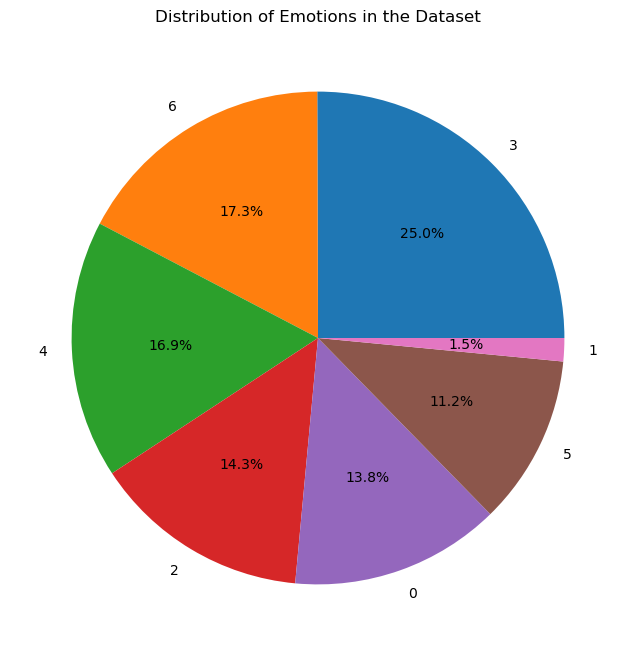

In [14]:
# Plotting the distribution of emotions
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts.values, labels=emotion_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Emotions in the Dataset')
plt.show()


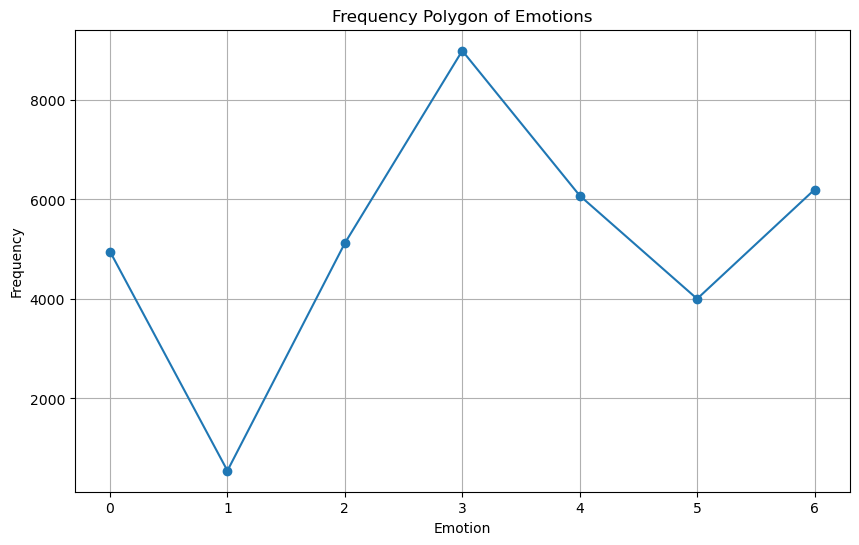

In [15]:
# Count the frequency of each emotion
emotion_counts = data['emotion'].value_counts().sort_index()

# Plotting a frequency polygon
plt.figure(figsize=(10, 6))
plt.plot(emotion_counts.index, emotion_counts.values, marker='o', linestyle='-')
plt.title('Frequency Polygon of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Bivariate Exploration

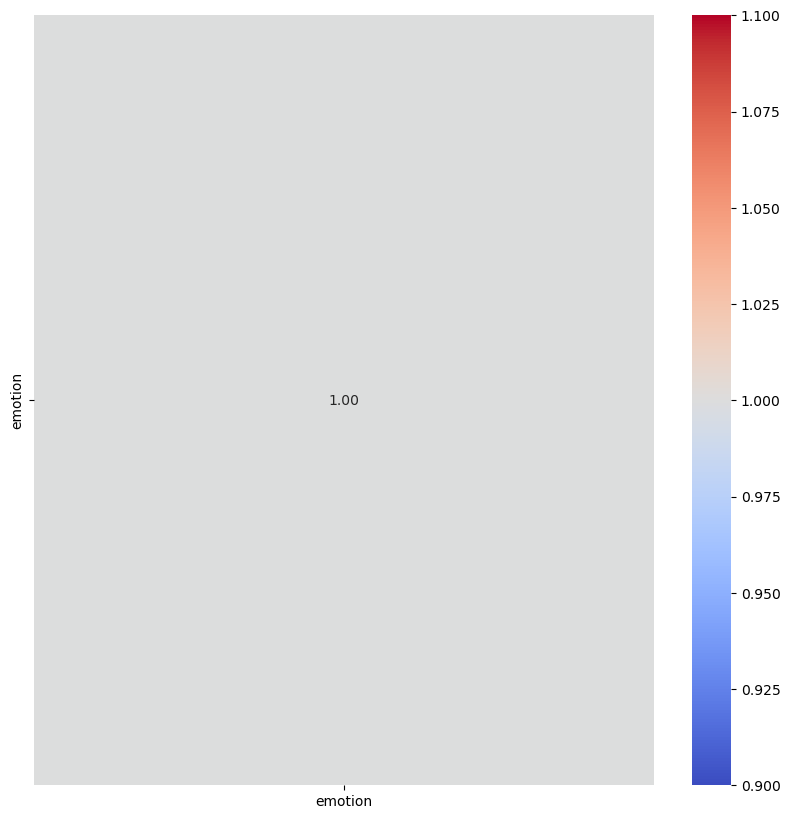

In [16]:
# Plotting the correlation matrix of the data using a heatmap

plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

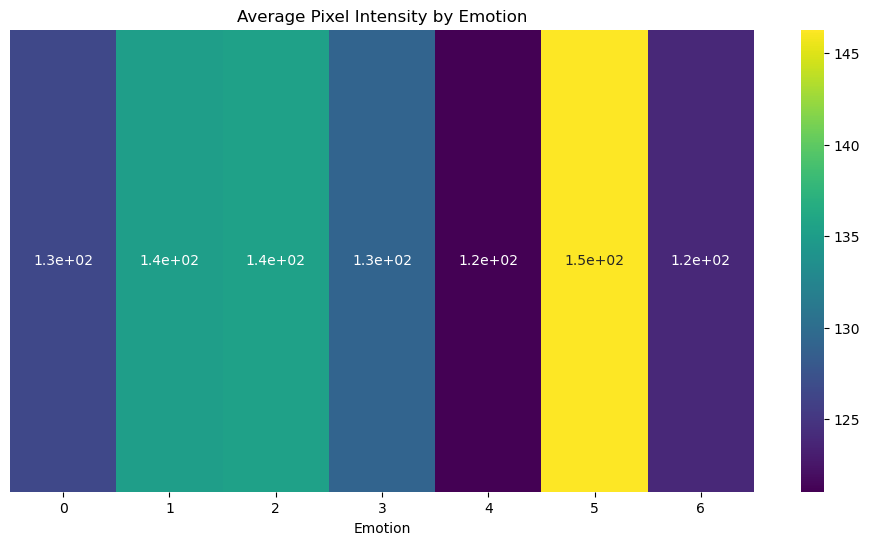

In [17]:
# Convert pixel strings to lists of integers and calculate the mean intensity
data['mean_intensity'] = data['pixels'].apply(lambda x: np.mean([int(p) for p in x.split()]))

# Group by emotion and calculate the average mean intensity
emotion_intensity = data.groupby('emotion')['mean_intensity'].mean()

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(emotion_intensity.values.reshape(1, -1), annot=True, cmap='viridis',
            xticklabels=emotion_intensity.index, yticklabels=False)
plt.title('Average Pixel Intensity by Emotion')
plt.xlabel('Emotion')
plt.show()

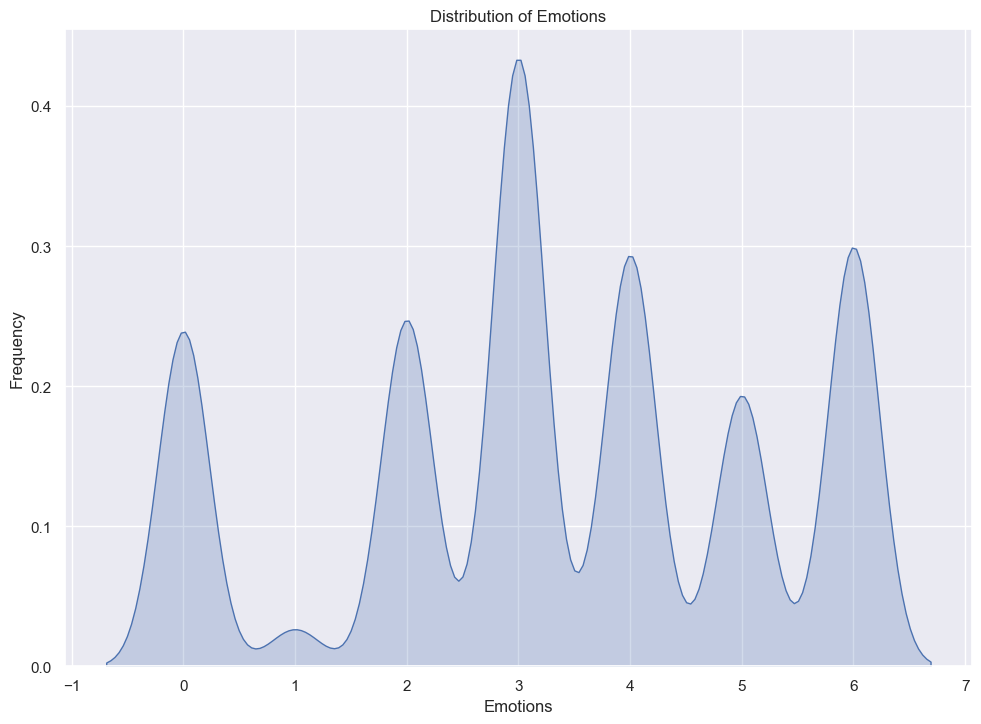

In [18]:
# Cluster analysis
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data['emotion'], shade=True)
plt.title('Distribution of Emotions')
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.show()

## Preprocessing Data 


In [19]:
X_train = []
y_train = []
X_test = []
y_test = []
X_val = []
y_val = []

for index, row in data.iterrows():
    k = row['pixels'].split(" ")
    if row['Usage'] == 'Training':
        X_train.append(np.array(k))
        y_train.append(row['emotion'])
    elif row['Usage'] == 'PublicTest':
        X_test.append(np.array(k))
        y_test.append(row['emotion'])
    elif row['Usage'] == 'PrivateTest':
        X_val.append(np.array(k))
        y_val.append(row['emotion'])

In [20]:
data["Usage"].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [21]:
type(data["pixels"][0])

str

In [22]:
type(X_train[0])

numpy.ndarray

In [23]:
X_train = np.array(X_train, dtype = 'uint8')
y_train = np.array(y_train, dtype = 'uint8')
X_test = np.array(X_test, dtype = 'uint8')
y_test = np.array(y_test, dtype = 'uint8')

In [24]:
y_train= to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

 ## Reshaping Data

In [25]:
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

 ## Building a Model using CNN

In [26]:
def FER_Model(input_shape=(48,48,1)):
    # first input model
    visible = Input(shape=input_shape, name='input')
    num_classes = 7
    #the 1-st block
    conv1_1 = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_1')(visible)
    conv1_1 = BatchNormalization()(conv1_1)
    conv1_2 = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_2')(conv1_1)
    conv1_2 = BatchNormalization()(conv1_2)
    pool1_1 = MaxPooling2D(pool_size=(2,2), name = 'pool1_1')(conv1_2)
    drop1_1 = Dropout(0.3, name = 'drop1_1')(pool1_1)#the 2-nd block
    conv2_1 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_1')(drop1_1)
    conv2_1 = BatchNormalization()(conv2_1)
    conv2_2 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_2')(conv2_1)
    conv2_2 = BatchNormalization()(conv2_2)
    conv2_3 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_3')(conv2_2)
    conv2_2 = BatchNormalization()(conv2_3)
    pool2_1 = MaxPooling2D(pool_size=(2,2), name = 'pool2_1')(conv2_3)
    drop2_1 = Dropout(0.3, name = 'drop2_1')(pool2_1)#the 3-rd block
    conv3_1 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_1')(drop2_1)
    conv3_1 = BatchNormalization()(conv3_1)
    conv3_2 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_2')(conv3_1)
    conv3_2 = BatchNormalization()(conv3_2)
    conv3_3 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_3')(conv3_2)
    conv3_3 = BatchNormalization()(conv3_3)
    conv3_4 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_4')(conv3_3)
    conv3_4 = BatchNormalization()(conv3_4)
    pool3_1 = MaxPooling2D(pool_size=(2,2), name = 'pool3_1')(conv3_4)
    drop3_1 = Dropout(0.3, name = 'drop3_1')(pool3_1)#the 4-th block
    conv4_1 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_1')(drop3_1)
    conv4_1 = BatchNormalization()(conv4_1)
    conv4_2 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_2')(conv4_1)
    conv4_2 = BatchNormalization()(conv4_2)
    conv4_3 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_3')(conv4_2)
    conv4_3 = BatchNormalization()(conv4_3)
    conv4_4 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_4')(conv4_3)
    conv4_4 = BatchNormalization()(conv4_4)
    pool4_1 = MaxPooling2D(pool_size=(2,2), name = 'pool4_1')(conv4_4)
    drop4_1 = Dropout(0.3, name = 'drop4_1')(pool4_1)
    
    #the 5-th block
    conv5_1 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_1')(drop4_1)
    conv5_1 = BatchNormalization()(conv5_1)
    conv5_2 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_2')(conv5_1)
    conv5_2 = BatchNormalization()(conv5_2)
    conv5_3 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_3')(conv5_2)
    conv5_3 = BatchNormalization()(conv5_3)
    conv5_4 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_4')(conv5_3)
    conv5_3 = BatchNormalization()(conv5_3)
    pool5_1 = MaxPooling2D(pool_size=(2,2), name = 'pool5_1')(conv5_4)
    drop5_1 = Dropout(0.3, name = 'drop5_1')(pool5_1)#Flatten and output
    flatten = Flatten(name = 'flatten')(drop5_1)
    ouput = Dense(num_classes, activation='softmax', name = 'output')(flatten)# create model 
    model = Model(inputs =visible, outputs = ouput)
    # summary layers
    print(model.summary())
    
    return model

## Compiling the Model

In [27]:
model = FER_Model()
opt = Adam(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 48, 48, 1)]       0         
                                                                 
 conv1_1 (Conv2D)            (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 conv1_2 (Conv2D)            (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 pool1_1 (MaxPooling2D)      (None, 24, 24, 64)        0     

## Image Augmentation

In [28]:
datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range = 10,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode = 'nearest')
testgen = ImageDataGenerator(rescale=1./255)
datagen.fit(X_train)
batch_size = 64

In [29]:
train_flow = datagen.flow(X_train, y_train, batch_size=batch_size) 
test_flow = testgen.flow(X_test, y_test, batch_size=batch_size)

 ## Training The Model

In [30]:
%%script false --no-raise-error

num_epochs = 40
history = model.fit_generator(train_flow, 
                    steps_per_epoch=len(X_train) / batch_size, 
                    epochs=num_epochs,  
                    verbose=1,  
                    validation_data=test_flow,
                    validation_steps=len(X_test) / batch_size)

Couldn't find program: 'false'


 ## Save the Model

In [31]:
%%script false --no-raise-error
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights('model.h5')

Couldn't find program: 'false'


In [32]:
model = model_from_json(open("model.json", "r").read())
model.load_weights('model.h5')

## Testing the Model 

In [33]:
import cv2
import numpy as np
from keras.preprocessing.image import img_to_array
import cv2
face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
ip = "http://192.168.1.155:8080/video"
cap = cv2.VideoCapture(0)

while cap.isOpened():
    res, frame = cap.read()
    if not res:
        break
    
    # Resize the frame
    frame = cv2.resize(frame, None, fx=0.7, fy=0.7, interpolation=cv2.INTER_AREA)

    height, width, channel = frame.shape
    gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_haar_cascade.detectMultiScale(gray_image)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, pt1=(x, y), pt2=(x + w, y + h), color=(255, 0, 0), thickness=2)
        roi_gray = gray_image[y-5:y + h+5, x-5:x + w+5]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        image_pixels = img_to_array(roi_gray)
        image_pixels = np.expand_dims(image_pixels, axis=0)
        image_pixels /= 255

        predictions = model.predict(image_pixels, verbose=0)
        max_index = np.argmax(predictions[0])
        emotion_detection = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        emotion_prediction = emotion_detection[max_index]

        # Display the emotion prediction
        cv2.putText(frame, emotion_prediction, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display the resulting frame
    cv2.imshow('Video', frame)

    # Break the loop with the 'q' keyQ
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture once everything is done
cap.release()
cv2.destroyAllWindows()


In [34]:
# test accuracy
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

113/113 [==============================] - 26s 230ms/step


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       467
           1       0.00      0.00      0.00        56
           2       0.00      0.00      0.00       496
           3       0.25      1.00      0.40       895
           4       0.00      0.00      0.00       653
           5       0.00      0.00      0.00       415
           6       0.00      0.00      0.00       607

    accuracy                           0.25      3589
   macro avg       0.18      0.14      0.06      3589
weighted avg       0.19      0.25      0.10      3589



In [36]:
print(confusion_matrix(y_test, y_pred))

[[  1   0   0 466   0   0   0]
 [  0   0   0  56   0   0   0]
 [  0   0   0 496   0   0   0]
 [  0   0   0 895   0   0   0]
 [  0   0   0 653   0   0   0]
 [  0   0   0 415   0   0   0]
 [  0   0   0 607   0   0   0]]


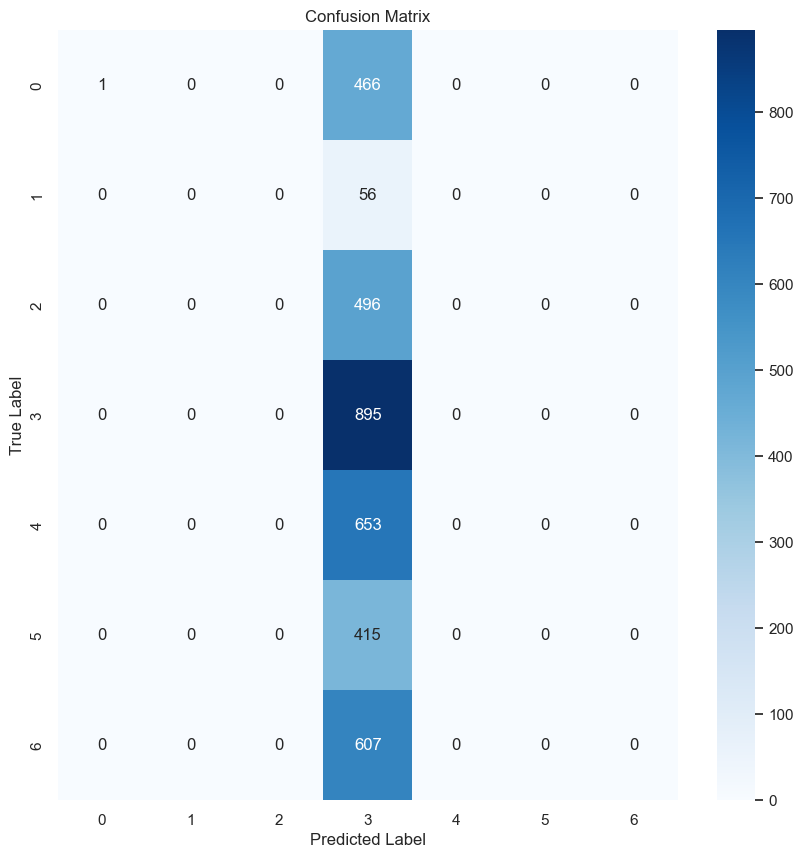

In [37]:
# confusion matrix betwen true and predicted
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')

plt.ylabel('True Label')
plt.show()